Extreme Learning Machines
-----

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.linalg import pinv2
from tqdm.notebook import tqdm

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42, stratify=mnist.target)

In [3]:
onehotencoder = OneHotEncoder(categories='auto')
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
y_train = onehotencoder.fit_transform(y_train.reshape(-1, 1)).toarray()

X_test = scaler.fit_transform(X_test)
y_test = onehotencoder.fit_transform(y_test.reshape(-1, 1)).toarray()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(56000, 784)
(56000, 10)
(14000, 784)
(14000, 10)


To initialize our network, we need to identify the following:
1. The size of the input layer, which is the number of input features
2. Number of hidden neurons
3. Input to hidden weights
4. Hidden layer activation function

The size of the input layer refers to the number of input features of the dataset.

In [5]:
def compute_network_accuracy(hidden_size=1000):

    input_size = X_train.shape[1]

    input_weights = np.random.normal(size=[input_size,hidden_size])
    biases = np.random.normal(size=[hidden_size])

    def relu(x):
        return np.maximum(x, 0, x)

    def hidden_nodes(X):
        G = np.dot(X, input_weights)
        G = G + biases
        H = relu(G)
        return H

    output_weights = np.dot(pinv2(hidden_nodes(X_train)), y_train)

    def predict(X):
        out = hidden_nodes(X)
        out = np.dot(out, output_weights)
        return out

    prediction = predict(X_test)
    correct = 0
    total = X_test.shape[0]

    for i in range(total):
        predicted = np.argmax(prediction[i])
        actual = np.argmax(y_test[i])
        correct += 1 if predicted == actual else 0
    accuracy = correct/total
    print('Accuracy for ', hidden_size, ' hidden nodes: ', accuracy)

    return hidden_size, accuracy

In [6]:
from datetime import datetime
X=[]
y=[]
t=[]
for h in range(1,8):
    size = h*1000
    start = datetime.now()
    tmp_X, tmp_y = compute_network_accuracy(size)
    X.append(tmp_X)
    y.append(tmp_y)
    tmp_t = (datetime.now()-start).seconds
    print(tmp_t, "s")
    t.append(tmp_t)

Accuracy for  1000  hidden nodes:  0.941
12 s
Accuracy for  2000  hidden nodes:  0.9556428571428571
49 s
Accuracy for  3000  hidden nodes:  0.9635714285714285
111 s
Accuracy for  4000  hidden nodes:  0.9659285714285715
207 s
Accuracy for  5000  hidden nodes:  0.9698571428571429
344 s
Accuracy for  6000  hidden nodes:  0.9713571428571428
489 s
Accuracy for  7000  hidden nodes:  0.9737857142857143
819 s


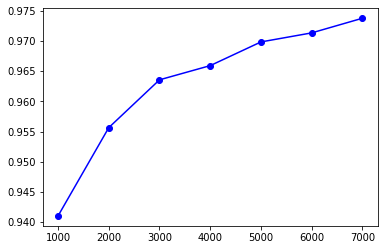

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, y, '-bo')

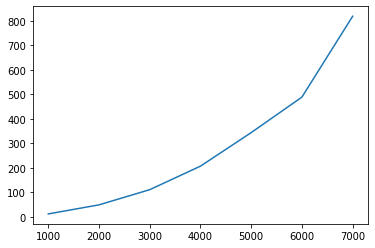

In [8]:
plt.plot(X, t)